# Support Vector Machine (SVM)

## 선형(Linear) SVM 

- 딥러닝 이전에 분류에서 뛰어난 성능으로 가장 활용도가 높았던 분류모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간크기의 데이터셋과 특성(Feature)이 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**
- 분류하는 경계 지점에 데이터 섞여 있을 가능성 높음(경계 데이터) 
- 경계 부문에 어떤 데이터가 있을지 모르기 때문에, 경계 MARGIN이 넓을 수록 좋음
- 나누었을 때, 두 그룹 간 거리가 넓으면 넓을수록 좋음
- => 그래야 TEST DATA에 대한 오차 줄여줄 수 있음

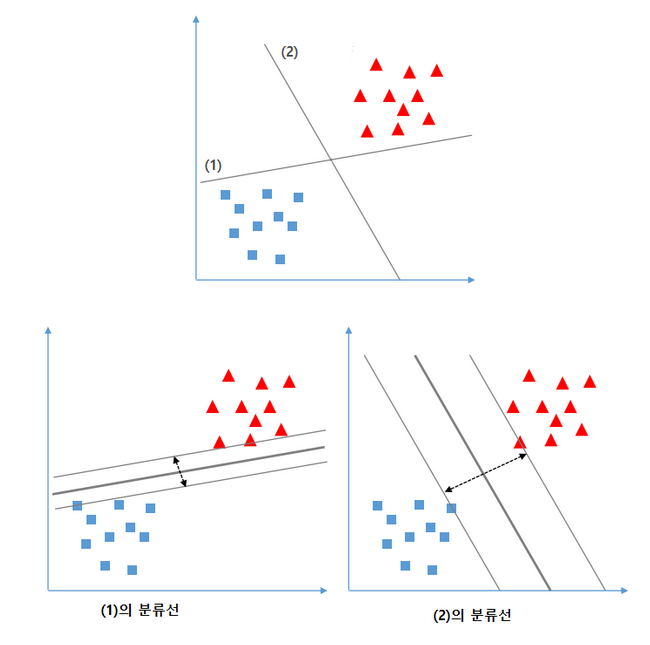

## 목표: support vector간 가장 넓은 margin 가지는 초평면(결정경계) 탐색
> ### 초평면
> - 데이터가 존재하는 공간(ex - 표의 컬럼 수)보다 1차원 낮은 부분공간
>    - n차원의 초평면은 n-1차원
>    - 공간 나누기 위해 초평면 사용
>    - 1차원-점, 2차원-선, 3차원-평면, 4차원이상 초평면

- Support Vector: 경계 찾아내는데 기준이 되는 데이터포인트. 초평면(결정경계)에 가장 가까이 있는 vector(데이터포인트) 의미
- Decision boundary: 결정 경계. 분류하는 경계선으로 margin의 중간 지점
- margin : 두 support vector간 너비
    - 결정경계와 결정 경계와 가장 가까이에 위치한 데이터(Support Vector) 간의 사이
- margin이 넓은 결정경계 만드는 함수 찾는 것

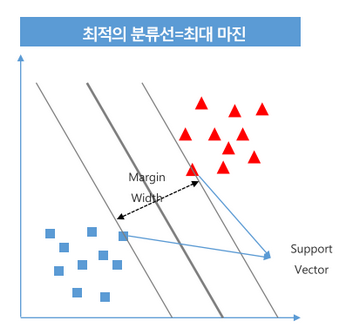

## Hard Margin, Soft Margin
- Soft Margin: Overfitting(과적합) 방지하기 위해 어느 정도 오차 허용하는 방식
    - ex)low c
    - 일반화 되어 이상치에 대한 문제 해결. Train Set 정확도는 떨어지더라도, Test Data 정확도 올라갈 수 있음
- Hard Margin: 반대로 오차를 허용하지 않는 방식
    - ex) large c
    - Train Set에 과적합되어 Test Set 정확도 떨어질 수 있음
- 모든 데이터셋이 위 그림처럼 완전히 분류 되는 것은 아님
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파마미터인 C** 조정해 마진 변경
- C(하이퍼 파라미터)
    - 기본값 1
    - 파라미터값 크게 주면, 마진폭 좁아져 마진 오류가 작아지나 Overfitting 일어날 가능성 큼
        - UnderfinntingL C 값을 크게 잡아줌
    - 파라미터값 작게 주면, 마진폭 넓어져 마진 오류가 큼. 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터 성능 올라감. 그러나, underfitting  될 가능성 있음
        - Overfitting: C 값을 작게 작아줌


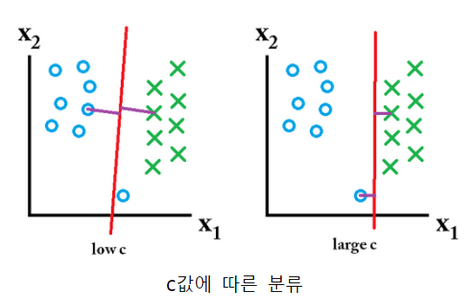

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [3]:
# SVM은 선형모델이기 때문에 Scaling 작업 필요
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# from sklearn.svm import LinearSVC
# svc = LinearSVC()

# C 커질수록 overfitting 날 가능성. 작아질수록 underfitting 날 가능성 높아짐
svc = SVC(kernel = 'linear', 
          C = 200,
          random_state = 1)  # 어떤 방식으로 결정경계 찾을 것인지 - 선형. 기본값은 rbf
svc.fit(X_train_scaled, y_train)

SVC(C=200, kernel='linear', random_state=1)

In [5]:
# C = 200 일 때
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9976525821596244, 0.965034965034965)

In [6]:
# C = 0.01일 때
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9976525821596244, 0.965034965034965)

In [7]:
# C = 1.0일 때
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9976525821596244, 0.965034965034965)

## 커널 서포트 벡터 머신
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
    - 차원을 높혀줌(1차원 공간 -> 2차원 공간)
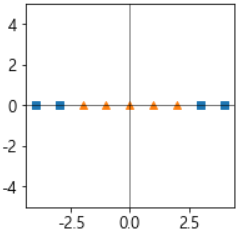

- 다항식 특성 추가해 차원을 늘려 선형 분리가 되도록 변환   
<center>[2차원으로 변환 $x_3=x_1^2$ 항 추가]</center>

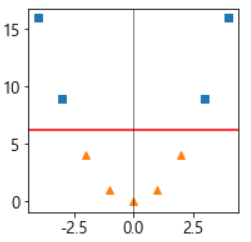

### 차원 늘리는 경우의 문제
- 다항식 특성을 추가하는 방법? 
    - 낮은 차수 다항식: 데이터 패턴을 잘 표현하지 못해 과소적합 
    - 높은 차수 다항식: 과대적합과 모델 느리게 하는 문제 발생

### 커널 트릭(Kernel trick)
- 커널 트릭: 다항식 만들기 위한 특성 추가하지 않으면서 수학적 기교 적용해 다항식 특성을 추가한 것과 같은 결과 얻을 수 있음
- N개의 기준값(N차원)을 정해 거리를 재는 형태
    - ex) 1차원 - 기준값 2개(3, 5)를 정해서 x(-2, 0, ...)와의 거리 계산 => 2차원이 됨
    - l1: -2와 3과의 거리 - 5
    - l2: -2와 5와의 거리 7

#### 방사기저(radial base function-RBF) 함수
- 커널 서포트 벡터 머신의 기본 커널 함수
- 기준점들이 되는 위치를 지정하고 각 샘플이 그 기준점들과 얼마나 떨어졌는지 계산 => 유사도(거리)
- 기준점 별 유사도 계산한 값은 원래 값보다 차원이 커지고 선형적으로 구분될 가능성 높아짐
- exp(5): e의 5승
- e: 2.718....
- x: 우리가 갖고 있는 값
- l: 거리 재는 기준값
- r: 우리가 정하는 하이퍼파라미터(마이너스 감마)
    - 감마 값이 커질수록 결과값은 작아지고, 감마 값이 작아질수록 결과값은 커짐
    - ex) gamma1 = 10, gamma2 = 5일 때, 방사기저 식 자체가 -r여서, gamma1 = -10, gamma2 = -5로 들어감


    
$$
\Phi(x, l) = exp\left(-\gamma \left\|x-l\right\|^2\right)
$$
<center>방사기저함수($\Phi$) x: 샘플, l: 기준값<center>

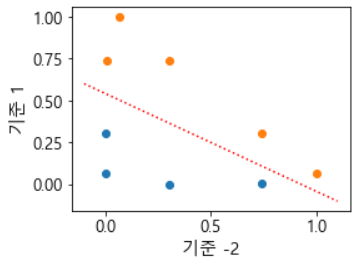
<center>$gamma=0.3, 기준점:-2,1$</center>

- ### RBF(radial basis function) 하이퍼파라미터
    - C
        - 오차 허용기준. 작은 값일 수록 많이 허용
            - 큰 값일수록 과적합이 날 가능성 높아짐
        - 과적합일 경우, 값을 감소시키고, 과소적합일 경우 값을 증가 시킴
    - gamma 
        - 방사기저함수의 $\gamma$로 규제 역할 
            - 큰 값일수록 과대적합(Overfitting) 가능성 높아짐
        - 모델이 과대적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가시킴

# Guide
- 커널 기법? 다항식 차수 만드는 것이 아니라, 각 샘플을 함수에 넣어 나오는 값으로 같은 효과를 가지게 함
- C
    - 과적합? 훈련셋에 타이트하게 맞춘 것 -> 오차허용 늘려 공간 확보해야 하므로 값 줄임(작은 값일 수록 많이 허용)    
    - 과소적합? 오차 허용 크게 잡은 것 ->  오차허용 줄여야하므로 값 늘림(큰값은 적게 허용)
- gamma
    - 감마가 크면 반환값 작아지고, 감마가 작으면 반환값 커짐($-\gamma$ 곱하므로)
    - 감마가 작을수록 값들의 거리가 멀어지고(큰 값이 결과로 나오므로) 클수록 거리 가까워짐
    - 그래서 gamma 가 크면 거리가 타이트해져 과적합 일어날 수 있음(공간의 여유가 없으므로)
    - svm - 비선형 분리와 rbf 테스트.ipynb 문서 확인
- 정리
    - 분류할 때, 경계선 근처에 있는 값들이 결정 경계에 영향
        - gamma값을 크게 넣으면 작은 반환값 도출 => 분할 경계에서 멀리 있는 값들의 경우, 분할 경계 값 정하는데 영향 잘 끼치지 못함
            - 경계선 근처에 있는 값? 이상치 존재할 가능성 높음 => 그런 값들이 분할 경계 값 정하는데 영향 미침
        - gamma 값을 작게 넣으면 큰 반환값 도출 => 분할 경계를 정하는데 분할 경계에서 멀리 있는 값들도 영향을 미침

In [8]:
# SVC - SVM Classifier의 약자
rbf_svc = SVC(kernel = 'rbf',  # default: rbf
              C = 1,  # soft margin ~ hard margin  underfitting<==일반화==>overfitting
              gamma = 0.01,  # rbf의 gamma; underfitting<==일반화==>overfitting - 실수, 문자열(scale: 1/(컬럼수 * 컬럼의 분산값), auto: 1/컬럼수
              probability = True,  # True로 지정해야 predict_proba()를 호출할 수 있음(기본: False)
              random_state = 1)

In [9]:
rbf_svc.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, probability=True, random_state=1)

In [10]:
pred_train = rbf_svc.predict(X_train_scaled)
pred_test = rbf_svc.predict(X_test_scaled)

In [11]:
# C: 1, gamma: 1 
# (1.0, 0.6293706293706294)=> over fitting
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9765258215962441, 0.965034965034965)

In [12]:
# C: 1, gamma: 0.5 
# (1.0, 0.8321678321678322)
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9765258215962441, 0.965034965034965)

In [13]:
# C: 1, gamma: 0.1 
# (0.9953051643192489, 0.9370629370629371)
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9765258215962441, 0.965034965034965)

In [14]:
# C: 1, gamma: 0.01
# (0.9765258215962441, 0.965034965034965)
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9765258215962441, 0.965034965034965)

In [15]:
from sklearn.metrics import recall_score, precision_score
recall_score(y_train, pred_train), precision_score(y_train, pred_train)

(0.9962546816479401, 0.9672727272727273)

In [16]:
# 확률값을 줘야 됨
from sklearn.metrics import roc_auc_score, average_precision_score
pos_proba = rbf_svc.predict_proba(X_train_scaled)[:, 1]
roc_auc_score(y_train, pos_proba), average_precision_score(y_train, pos_proba)

(0.996019127034603, 0.9969714508587535)

## GridSearch로 최적의 조합찾기

In [17]:
param = {
    'kernel': ['rbf', 'linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10]
}
svc = SVC(random_state = 1, probability = True)
gs_svc = GridSearchCV(svc,
                      param_grid = param,
                      scoring = 'accuracy',
#                       scoring = ['accuracy', 'roc_auc'],
#                       refit = 'accuracy',
                      cv = 3,
                      n_jobs = -1)

In [18]:
gs_svc.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [19]:
# 가장 좋은 성적
gs_svc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [20]:
# linear일때, gamma값 필요없음
pd.DataFrame(gs_svc.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
42,0.015293,0.001243,0.001330,0.000471,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.978873,0.992958,0.978873,0.983568,0.00664,1
29,0.019049,0.010326,0.001662,0.000470,0.1,10,linear,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",0.978873,0.985915,0.978873,0.981221,0.00332,2
27,0.011997,0.001628,0.001663,0.000941,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.978873,0.985915,0.978873,0.981221,0.00332,2
21,0.016682,0.004961,0.001331,0.000471,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.978873,0.985915,0.978873,0.981221,0.00332,2
23,0.015678,0.004607,0.001346,0.000460,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.978873,0.985915,0.978873,0.981221,0.00332,2


### 교차검증

In [21]:
from sklearn.model_selection import cross_val_score

svc2 = SVC(kernel = 'rbf', C = 10, gamma = 0.01)
result = cross_val_score(svc2,
                         X_train_scaled,
                         y_train,
                         scoring = 'accuracy',
                         cv = 3)

In [22]:
result

array([0.97887324, 0.99295775, 0.97887324])

In [23]:
np.mean(result)

0.983568075117371

## iris DataSet으로 분류 
- 다중 클래스 분류
- GridSearch, SVM, 평가지표: accuracy

In [43]:
import numpy as np
import pandas as pd 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [51]:
X, y = load_iris(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [52]:
# SStandard Scaler로 스케일링 ->  SVM 모델 학습,추론
# Pipeline
order = [('scaler', StandardScaler()),
         ('svc', SVC(random_state = 1))]
pipeline = Pipeline(order)

In [53]:
# 그리드서치
from sklearn.model_selection import GridSearchCV
param = {
    "svc__kernel": ['linear', 'rbf'],
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.1, 1, 10, 100]
}
gs = GridSearchCV(pipeline,
                  param_grid = param,
                  scoring = 'accuracy',
                  cv = 3,
                  n_jobs = -1)

In [54]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [55]:
gs.best_params_

{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [56]:
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
41,0.003843,0.000642,0.001661,4.675492e-04,100,0.01,rbf,"{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kern...",0.973684,0.972973,0.972973,0.973210,0.000335,1
30,0.003988,0.000004,0.001329,4.696846e-04,10,0.01,linear,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.947368,0.972973,0.972973,0.964438,0.012070,2
32,0.003988,0.000001,0.001000,4.380389e-06,10,0.1,linear,"{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...",0.947368,0.972973,0.972973,0.964438,0.012070,2
34,0.004654,0.000939,0.001330,4.701347e-04,10,1,linear,"{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel':...",0.947368,0.972973,0.972973,0.964438,0.012070,2
38,0.004322,0.000470,0.000997,8.104673e-07,10,100,linear,"{'svc__C': 10, 'svc__gamma': 100, 'svc__kernel...",0.947368,0.972973,0.972973,0.964438,0.012070,2


In [57]:
accuracy_score(y_train, gs.predict(X_train)), accuracy_score(y_test, gs.predict(X_test))

(0.9732142857142857, 0.9736842105263158)